<a href="https://colab.research.google.com/github/pdrzxzz/machine-learning/blob/main/polynomial_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Polynomial Regression

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine-Learning-A-Z-Codes-Datasets/Part 2 - Regression/Section 6 - Polynomial Regression/Python/Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [4]:
X[:5] # Levels of experience

array([[1],
       [2],
       [3],
       [4],
       [5]])

In [5]:
y[:5] # Salaries

array([ 45000,  50000,  60000,  80000, 110000])

## Visualizing Data

Text(0.5, 0, 'Levels')

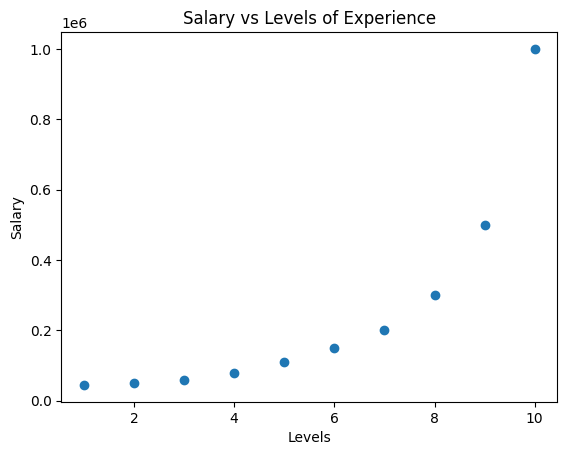

In [40]:
plt.scatter(X, y)
plt.title('Salary vs Levels of Experience')
plt.ylabel('Salary')
plt.xlabel('Levels')

Let's try the simple linear regression first and then we try the polynomial linear regression.

## Training the Linear Regression model on the whole dataset

In [7]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

## Visualising the Linear Regression results

In [8]:
# Predicting (Using) the model
y_pred = lin_reg.predict(X)
y_pred
# Predicted salaries from linear model

array([-114454.54545455,  -33575.75757576,   47303.03030303,
        128181.81818182,  209060.60606061,  289939.39393939,
        370818.18181818,  451696.96969697,  532575.75757576,
        613454.54545455])

Text(0.5, 0, 'Levels')

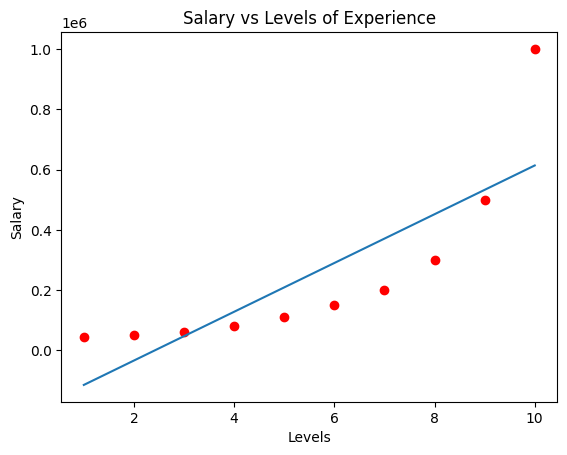

In [42]:
plt.scatter(X, y, color="red")
plt.plot(X, y_pred)
plt.title('Salary vs Levels of Experience')
plt.ylabel('Salary')
plt.xlabel('Levels')

## Training the Polynomial Regression model on the whole dataset

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
# Generate a new feature matrix consisting of all polynomial combinations
# of the features with degree less than or equal to the specified degree
poly_reg = PolynomialFeatures(degree=2)
poly_X = poly_reg.fit_transform(X)
poly_X

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

In [ ]:
lin_reg_2 = LinearRegression()
lin_reg_2.fit(poly_X, y)

LinearRegression()

## Visualising the Polynomial Regression results

In [12]:
# Predicting (Using) the model
y_pred_2 = lin_reg_2.predict(poly_X)
y_pred_2
# Predicted salaries from polynomial model

array([118727.27272727,  44151.51515151,   8439.39393939,  11590.90909091,
        53606.06060606, 134484.84848485, 254227.27272727, 412833.33333333,
       610303.03030303, 846636.36363636])

Text(0.5, 0, 'Levels')

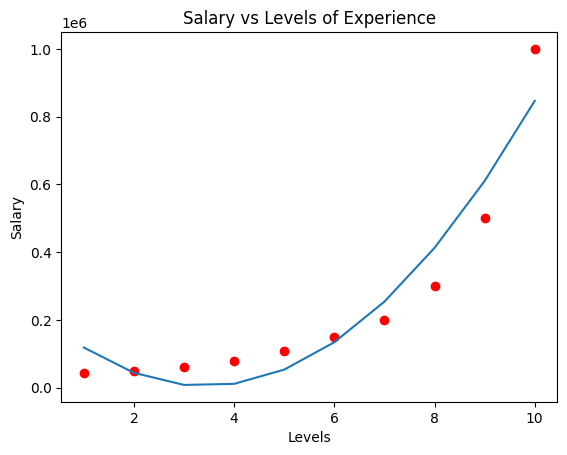

In [43]:
plt.scatter(X, y, color='red')
plt.plot(X, y_pred_2)
plt.title('Salary vs Levels of Experience')
plt.ylabel('Salary')
plt.xlabel('Levels')

It's close but still not good, let's try another approach

## Trying with degree=4

In [17]:
from sklearn.preprocessing import PolynomialFeatures
# Generate a new feature matrix consisting of all polynomial combinations
# of the features with degree less than or equal to the specified degree
poly_reg = PolynomialFeatures(degree=4)
poly_X_2 = poly_reg.fit_transform(X)
poly_X_2

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04]])

In [18]:
lin_reg_3 = LinearRegression()
lin_reg_3.fit(poly_X_2, y)

LinearRegression()

In [20]:
# Predicting (Using) the model
y_pred_3 = lin_reg_3.predict(poly_X_2)
y_pred_3
# Predicted salaries from polynomial model

array([ 53356.64335675,  31759.90675984,  58642.1911421 ,  94632.86713282,
       121724.94172495, 143275.05827509, 184003.49650352, 289994.17249417,
       528694.63869462, 988916.08391612])

Text(0.5, 0, 'Levels')

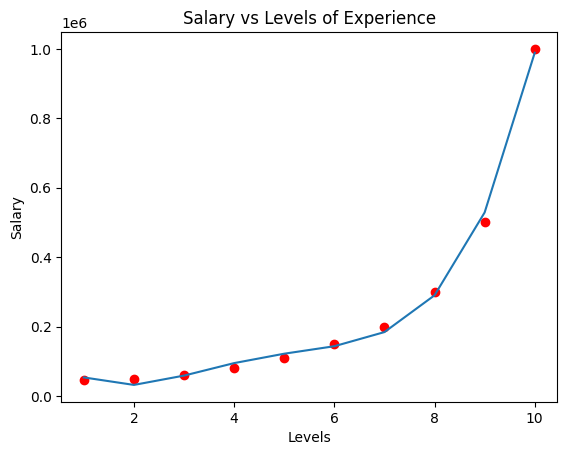

In [22]:
plt.scatter(X, y, color="red")
plt.plot(X, y_pred_3)
plt.title('Salary vs Levels of Experience')
plt.ylabel('Salary')
plt.xlabel('Levels')

Maybe overfitting, but i think it makes sense for this example.

### We can also have a smoother curve  

In [27]:
X_grid = np.arange(min(X), max(X), 0.1) # Return evenly spaced values within a given interval.
X_grid

<ipython-input-27-ee11b75875bb>:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.1) # Return evenly spaced values within a given interval.


array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2,
       2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5,
       3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8,
       4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1,
       6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4,
       7.5, 7.6, 7.7, 7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7,
       8.8, 8.9, 9. , 9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])

In [30]:
X_grid = X_grid.reshape((len(X_grid), 1)) # Format X_grid to be passed to fitting the model
X_grid[:10]

array([[1. ],
       [1.1],
       [1.2],
       [1.3],
       [1.4],
       [1.5],
       [1.6],
       [1.7],
       [1.8],
       [1.9]])

<ipython-input-26-a0378ea06138>:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.1)


Text(0.5, 0, 'Levels')

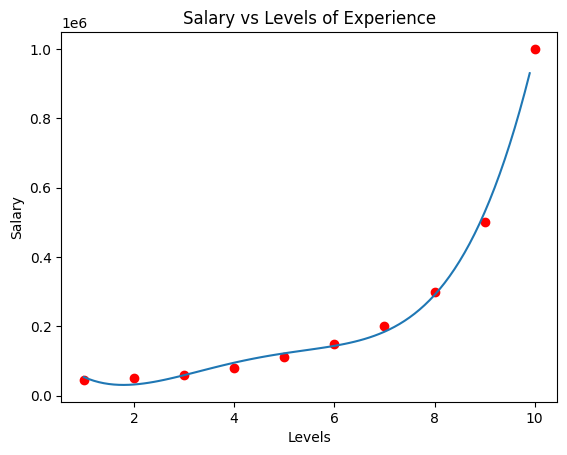

In [26]:
y_pred_3 = lin_reg_3.predict(poly_reg.fit_transform(X_grid))
plt.scatter(X, y, color="red")
plt.plot(X_grid, y_pred_3)
plt.title('Salary vs Levels of Experience')
plt.ylabel('Salary')
plt.xlabel('Levels')

Looks prettier and can have slightly better results for decimal levels.

## Predicting the salary from specified position



In [33]:
lin_reg.predict([[6.5]])

array([330378.78787879])

Wrong prediction!

In [39]:
lin_reg_3.predict(poly_reg.fit_transform([[6.5]]))

array([158862.45265155])

OK!